# Upset-Downset

This notebook is an introduction to the game Upset-Downset and the interface we've written for it in Python. In this first section let's learn the *ups* and *downs* of Upset-Downset.

## What Is Upset-Downset?

Upset-Downset is a combinatorial game. Though there are many flavors, for our purposes, a combinatorial game is a game in which
- two players alternate turns making moves from a clearly defined ruleset,
- there is perfect information, i.e., each player has complete knowledge of the game at all times,
- there are no chance elements, e.g., no dice rolling or card shuffling, and
- play is finite where the first player unable to move loses. 

In Upset-Downset the two players **Up** and **Down** alternate turns deleting nodes
from graphs. **Up** moves by deleting a node, together with any
nodes connected to it by a path moving strictly *upward.* Similarly, **Down**  moves by deleting a
node, together with any nodes connected to it by a path moving strictly *downward*. Eventually one of the
players will find they cannot move because there are no nodes left. Whoever is first to find themselves in
this predicament loses.

The best way to learn to play, is to play! To begin, let's import the `upDown` module, instantiate a game and plot it using the `plot()` method.

In [12]:
from upDown import UpDown

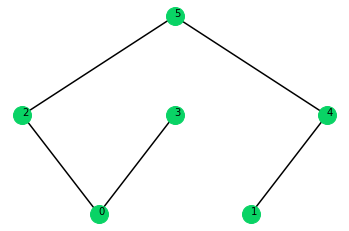

In [9]:
graph = {0:[2,3], 1:[4], 2:[5], 3:[], 4:[5], 5:[]}
G = UpDown(graph)
G.plot()

As you can see it was easy to instantiate the `upDown` object `G`. All that was needed was a dictionary representation of the graph:  every node $x$ in the graph is a key with corresponding value being the list of all nodes that are directly adjacent and above $x$.

You can interactively play the game `G` using the `play()` method and following the given instructions.

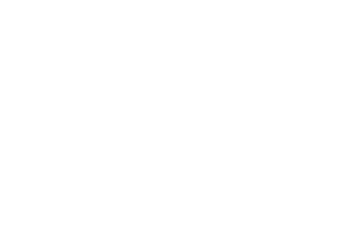


 Down wins!


In [11]:
G.play()

## Blue, Green and Red Nodes!

To make things even more interesting, let's add some color to our nodes: blue, green or red! The only added caveat is that  **Up** may only choose from blue or green node and **Down** may only choose from red or green nodes. However, no matter which node **Up**/**Down** chooses, all nodes above/below the chosen node are still removed regardless of their color.

Let's color the nodes in the game `G`. We efine the dictionary `colors` to indicate which color (value) each node (key) is, and instantiate our new game`rgbG` with the `colors` an argument. (We use the convention that $1$ corresponds to blue, $0$ to green, and $-1$ to red.)

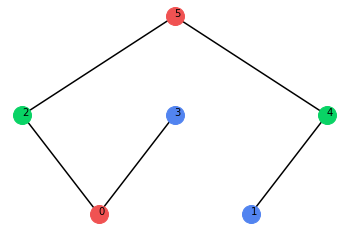

In [10]:
colors = {0:-1, 1:1, 2:0, 3:1, 4:0, 5:-1}
rgbG = UpDown(graph, colors)
rgbG.plot()

Play again, but with the new coloring!

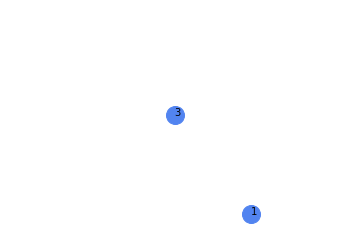


 Up wins!


In [6]:
rgbG.play()

# More Games!

That was pretty fun right? But what about more larger games, more complex games, with some underlying structure? Now, we know what you're thinking: it's quite a lot of work to instantiate games with more than five nodes by hand, and there's really no limit to the size, structure or coloring of the underlying graph! We've got you covered. In this section we'll look at generating and playing some interesting games of Upset-Downset via various subclasses of `UpDown`.

## This Game is So... Random

We can generate and play random games of Upset-Downset on any number of nodes with any coloring using the subclass `RandomGame`. Let's import `RandomGame` and take a look at what kinds of Upset-Downset games are out there.

In [13]:
from randomUpDown import RandomGame

To give you a taste of the number of positions available in Upset-Downset, in the cell below, we plot a few randomly generated games via the `RandomGame` class.

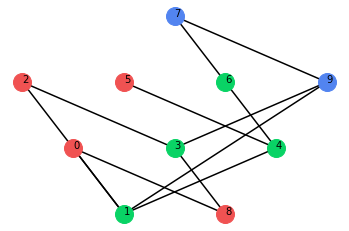

In [14]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random

num_games = 50
node_min = 5
node_max = 15

for _ in range(num_games):
    RGB = random.choice([True, False])
    num_nodes = random.randint(node_min, node_max)
    R = RandomGame(num_nodes, RGB=RGB)
    R.plot()
    plt.pause(0.25)
    clear_output(wait=True)

Test your skills on a random game in following cell. By default we've set `num_nodes = 10`, but it's a variable so do as your heart desires. Additionally, the default is to randomly color the nodes blue, green or red. To turn this feature off and play on all green nodes, set `RGB = False`. Have fun!

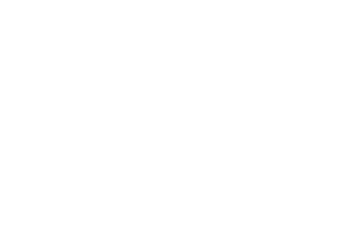


 Up wins!


In [21]:
num_nodes = 10
RGB = True #False

#Comment out the next line out if you want to play a specific game again.
R = RandomGame(num_nodes, RGB = RGB)
R.play()

We know... It's pretty hard to work out a general strategy with such random games. You never know what you're going to get! We'll now consider two more subclasses of `UpDown` for playing games with more structure.

## No Notebook is Complete Without...

complete bipartite graphs! Let's try playing Upset-Downset on complete bipartite graphs. We'll import `CompleteBipartiteGame` and initialize an instance `K` with the list of ordered pairs `graphs` as an argument. Each ordered pair $(m,n)$ defines a distinct complete bipartite graph having $m$-nodes on top and $n$-nodes on bottom.

In [12]:
from completeBipartiteUpDown import CompleteBipartiteGame

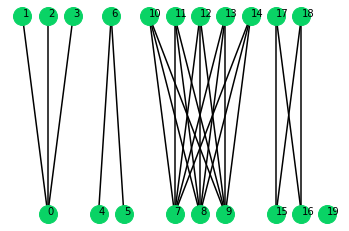

In [14]:
graphs = [(3,1), (1,2), (5,3), (2,2), (0,1)]
K = CompleteBipartiteGame(graphs)
K.plot()

Give it a go!

In [ ]:
K.play()

Do you notice any general strategies for playing complete bipartite games?

## The Secret of Nim

That's right, we can play a game of NIm dressed up as Upset-Downset. If you're unfamiliar, in Nim two players take turns removing objects from heaps. On their turn a player may remove any number of objects from exactly one heap, and the player to remove the last object wins. 

Lets see how a game of Nim can be realized as a game of Upset-Downset. To start we import the `nimUpDown` module and initialize a `NimGame` object with a list of the heap sizes we'd like to play on as an argument. 

In [8]:
from nimUpDown import NimGame

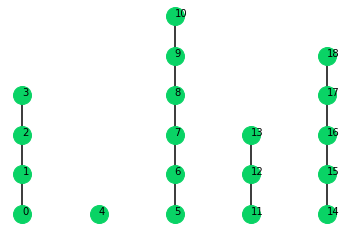

In [9]:
heaps = [4,1,6,3,5]
N = NimGame(heaps)
N.plot()

In making a move in a game of Nim all that matters is which heap you play in and how many objects to remove from that heap. How about you give it a try with the game `N`.

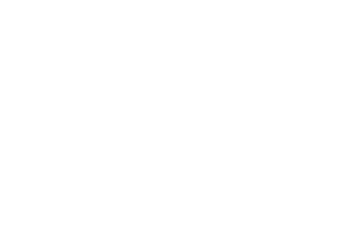


 Down wins!


In [53]:
N.play()

How about Nim? Do you notice any startegies? It turns out Nim was "solved" a long time ago. If you're interested see the [wiki](https://en.wikipedia.org/wiki/Nim) for more details.

# So You've Got Some Chops?

Now that you've learned the ropes, how about you try your luck against the AlphaZero model. Let's import the `Agent`class and instantiate the agent `alphaZero` with the path to underlying models parameters as an argument. If you'd like to play against a random agent set `path='./initial.pt'`.

In [15]:
from agent import Agent

alphaZero = Agent(path='./alpha_2.pt')

Let's play! In the cell below we instatiate a game and pass `alphaZero` as an argument to the `play()` method. In this case we've set `agent1=alphaZero` so that the agent moves first, to have the agent play second set `agent2=alphaZero` instead.  (NOTE: As of now an `Agent` can only play on games with 10 or less nodes.)

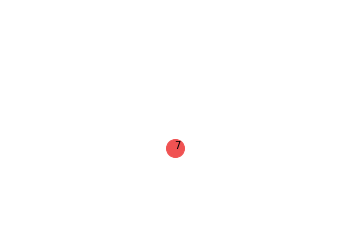


 Down wins!


In [18]:
H = RandomGame(10, RGB=True)
H.play(agent1=alphaZero)

We can also watch `alphaZero` play against itself!

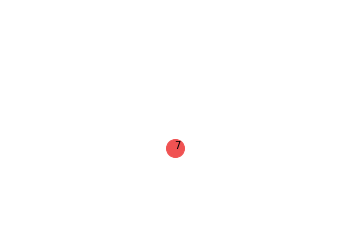


 Down wins!


In [19]:
H.play(agent1=alphaZero, agent2=alphaZero)